<a href="https://colab.research.google.com/github/jjcrofts77/TMB-MATH34041/blob/main/content/notebooks/Chapter1/Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 What are Networks?

A network (or graph) is a set of nodes connected by links. Mathematically a network is represented by a pair $N = (V,E)$, such that $V = \{v_1,v_2,\ldots v_n\}$ is a finite set of $n$ nodes and $E = \{e_1,e_2,\ldots e_m\}$ the set of  $m$ edges representing links between node pairs.

Given a network one may represent it in matrix form in a number of ways, the most popular of which is the *adjacency matrix* $A\in\mathbb{R}^{n\times n}$ which is defined as

$$
a_{ij} = \begin{cases}
1& i\sim j,\\
0& \text{otherwise.}
\end{cases}
$$

Here $i\sim j$ denotes that nodes $i$ and $j$ are adjacent to each other (i.e. they are connected).

```{note}
The above describes an undirected network containing no self-loops (i.e. a node cannot be adjacent to itself) or multiple loops (i.e. at most one link exists between each pair of nodes). Such a network is termed a **simple network** and much of what we cover in this course is for this case -- see below for a few exceptions!
```

The size, or *order*, of the network is given by $|V| = n$.

<br>

**Example 1.1.1**  Consider the following network $N_1 = (V_1,E_1)$ where

$$
 V_1 = \{v_1,\ldots, v_5\} \quad\text{ and }\quad E_1 = \{(1,2),(1,4),(2,4),(3,4),(3,5),(4,5)\}.
$$

The adjacency matrix of this network (see {numref}`FigExample111`a) is given below:

$$
A = \left(
      \begin{array}{ccccc}
      0 & 1 & 0 &1 & 0\\
      1 & 0 & 0 & 1 & 0\\
      0 & 0 & 0 & 1 & 1\\
      1 & 1 & 1 & 0 & 1\\
      0 & 0 & 1 & 1 & 0
      \end{array}
      \right).
$$ (Undir)

Note that unless told otherwise it is assumed that $(i,j)\in E$ implies $(j,i)\in E$, that is we assume the network to be undirected.  An example of a directed network is shown in {numref}`FigExample111`b; its adjacency matrix is given below

$$
A &= \left(
      \begin{array}{ccccc}
      0 & 1 & 0 &1 & 0\\
      0 & 0 & 1 & 1 & 0\\
      0 & 1 & 0 & 1 & 0\\
      1 & 1 & 1 & 0 & 0\\
      0 & 0 & 0 & 1 & 0
      \end{array}
      \right),\\ \nonumber &\neq A^T.
$$ (Dir)

In addition to undirected networks a number of other variants are possible. For example, the interaction might be weighted, i.e. interactions are not binary (0 or 1) but take values from the real number line. For example, an interaction might occur with a certain probability, or we might consider certain interactions to be more or less important than others, thus, it makes sense to attribute a `weight' to such connections. The result of which is a *weighted network*.  Note that other more complicated cases can occur but we are unlikely to come across them in this course.

```{figure} ../../images/NetworkExamples111.png
---
height: 350px
name: FigExample111
---
Representations of the undirected and directed networks given by the adjacency matrices of equations {eq}`Undir` and {eq}`Dir`, respectively.
```

<br>

Another useful, but less popular matrix representation, is given by the so-called *incidence matrix*. The incidence matrix provides a more edge-centric view of a network  $N = \{V, E\}$, where as before,

$$V=\{v_1,v_2,\ldots,v_n\},~~ E=\{e_1,e_2,\ldots, e_m\} ~\text{ and }~ e_j=(v_{j_1},v_{j_2}) ~\text{ with }~ 1\leq j_1, j_2\leq n,$$

and is given by the rectangular matrix $B=(b_{ij})$ whose $ij$th position is defined as  

$$
b_{ij} = \begin{cases}
1 & j_1 = i \text{ or }j_2=i,\\
0& \text{otherwise.}
\end{cases}
$$

Here, $1\leq i\leq m$ and $1\leq j\leq n$ .  

If the edge $(v_i, v_j)$ is present for a simple network then so is $(v_j, v_i)$, and so we only include one of each of these pairs in the incidence matrix (it doesn't matter which). The incidence matrix for the network in {numref}`FigExample111`(a) is given by

$$
B = \left(
      \begin{array}{rrrrrr}
      1 & 1 & 0 &0 & 0 & 0\\
      1 & 0 & 1 & 0 & 0 & 0\\
      0 & 0 & 0 & 1 & 1 & 0\\
      0 & 1 & 1 & 1 & 0 & 1\\
      0 & 0 & 0 & 0 & 1 & 1
      \end{array}
      \right).
$$

<br>

**Exercise** Write down the incidence matrix of the network given in {numref}`FigExample111`(b). Note that you will need to distinguish between uni- and bi-directional edges.

<br>

**Computational Exercise** The Python code below uses the NetworkX package to create the undirected network from Example 1.1.1 and then plots the network. See if you can adapt the code so as to display the directed version of the network (**Hint:** see [here](https://networkx.org/documentation/stable/reference/classes/digraph.html#networkx.DiGraph))

A network N with 5 nodes and 6 edges


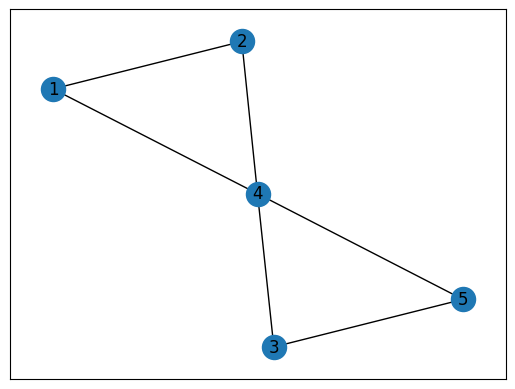

In [7]:
# plotting small networks using the NetworkX and pyvis

# 1. import the NetworkX package
import networkx as nx
N = nx.Graph()

# construct network by adding edges
edges = [(1,2),(1,4),(2,4),(3,4),(3,5),(4,5)]
N.add_edges_from(edges)

# check basic properties of N and plot it
V = N.number_of_nodes()
m = N.number_of_edges()
print("A network N with", V, "nodes and", m, "edges")
nx.draw_networkx(N) # plot